# Credit Cards Fraud Detection
In this notebook a classification algorithm is built for the highly unbalanced dataset of credit cards frauds (available at https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud). 

The overall dataset is composed of 284.807 observations, each of them with a binary target variable and 30 covariates. The target column "class" has a value of 0 if the operation is not fraudolent and 1 otherwise. This variable is highly unbalanced in favor of non-fraudolent operations. The feature column "Amount" represents the amount withdrawn in the corresponding operation while the column "Time" represents the number of seconds that enlapsed between the transaction considered and the first one in the dataset. The remaining columns are likely to be the result of a PCA to hide the true data for privacy reasons.

In [38]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from autogluon.tabular import TabularPredictor
from sklearn.decomposition import PCA


# Import and plot dataframe
data = pd.read_csv(r"C:\Users\PC-NB\Desktop\ML short\kaggle\credit card fraud\creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Variable Time
In the graphs plotted below, the upper one represents the frequency of withdrwals over time. Even though it is not specified the timining of the first withdrawal the cyclical pattern observed is the result of a different number of withdrawals between day and night. Instead, the graph below represents plots the density of withdrawals adjusted by class. The non-fraudolent withdrawals seem to be more stable with a cyclical evolution that reflects the one of the upper graph. Conversely, the fraudolent withdrawals are less stable yet this is likely due to the small number of observations. 

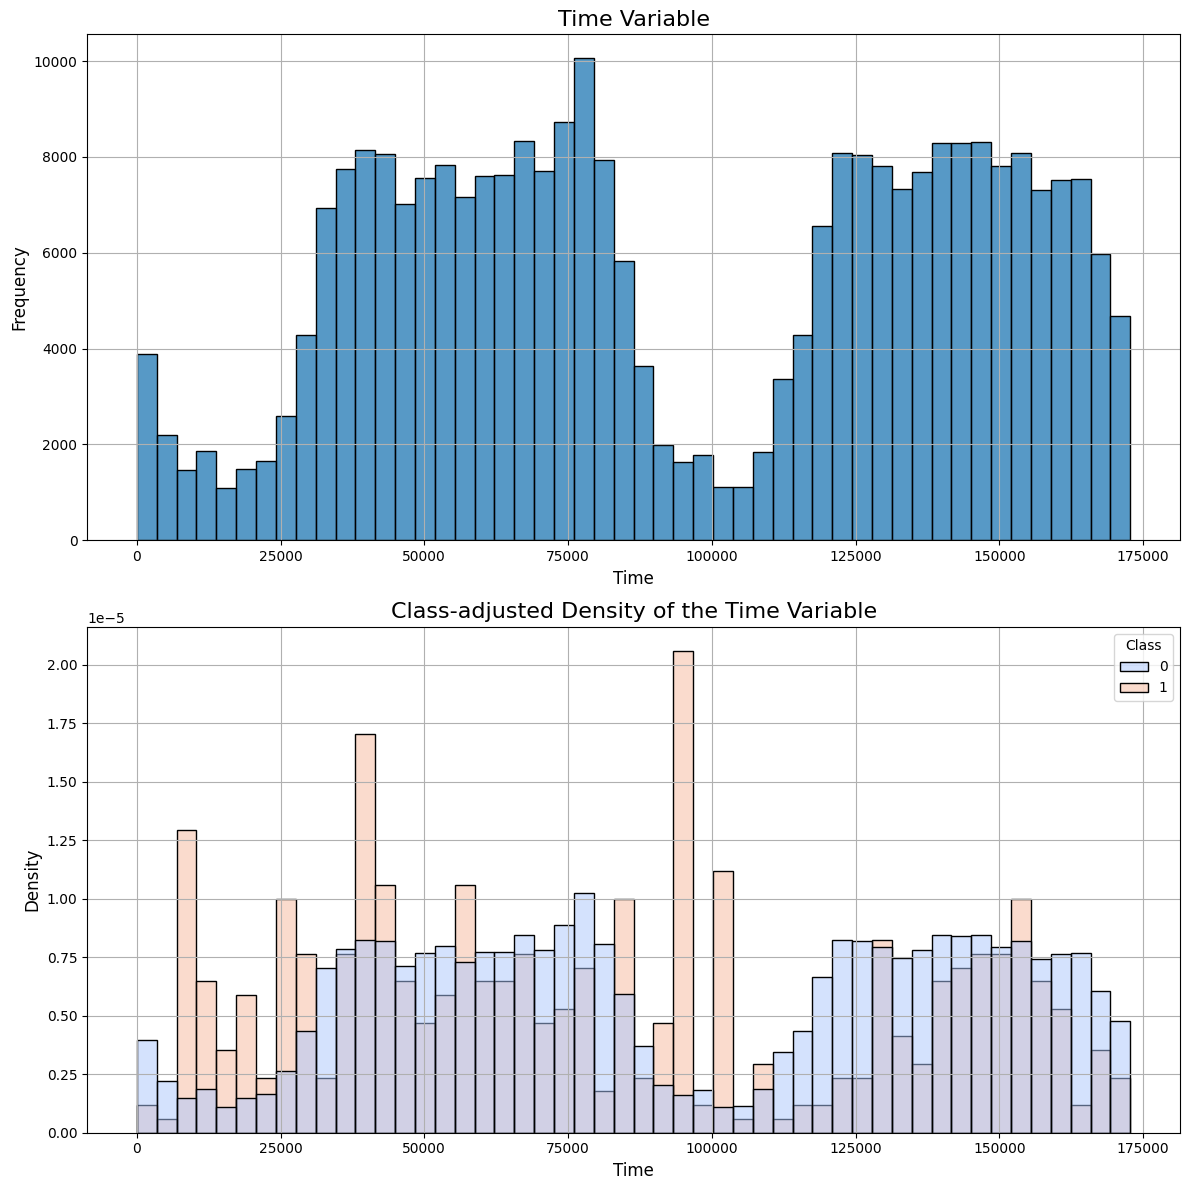

In [40]:
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
sns.histplot(data=data, x='Time', bins=50, common_norm=False, ax=axs[0])
axs[0].set_title('Time Variable', fontsize=16)
axs[0].set_xlabel('Time', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)
axs[0].grid(True)

sns.histplot(data=data, x='Time', hue='Class', bins=50, stat='density', common_norm=False, palette='coolwarm', ax=axs[1])
axs[1].set_title('Class-adjusted Density of the Time Variable', fontsize=16)
axs[1].set_xlabel('Time', fontsize=12)
axs[1].set_ylabel('Density', fontsize=12)
axs[1].grid(True)

plt.tight_layout()
plt.show()

## Variable "Amount"
The following graph shows, in a logarithmic scale, the amount withdrawn in each transaction based on the corresponding class.

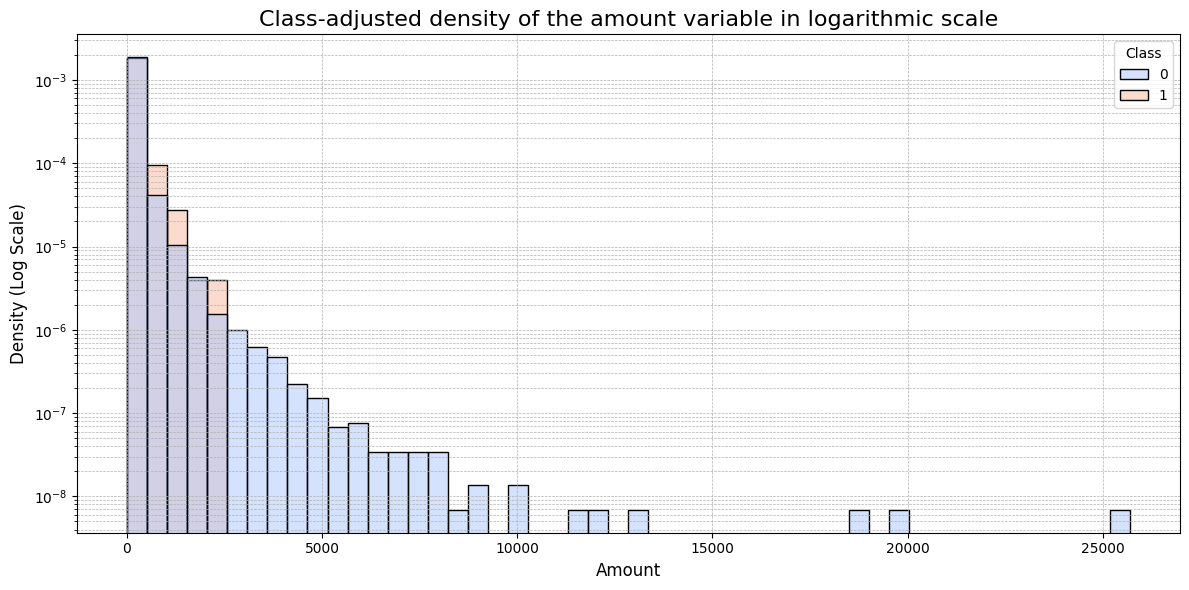

In [42]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Amount', hue='Class', bins=50, stat='density', common_norm=False, palette='coolwarm')
plt.yscale('log')
plt.title('Class-adjusted density of the amount variable in logarithmic scale', fontsize=16)
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Density (Log Scale)', fontsize=12)

plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()


## Remaining variables
For privacy reasons, the remaining variables are not public but named by the sequence "V1", "V2",..., "V28". The graph below confirm my initial suspicion: the variables are the result of a PCA transformation. In detail, the first graph considers the entire set of 28 columns and performs the PCA to then plot the first and second principal component. The second graphs plots the scatter of the variables "V1" and "V2". As the two graphs result in a rotation one of the other, the two columns "V1" and "V2" result in the ones with the highest variability suggesting for a previous PCA to blurry the true dataset. Form a practical point of view, this simply impede a feature engeneering step.

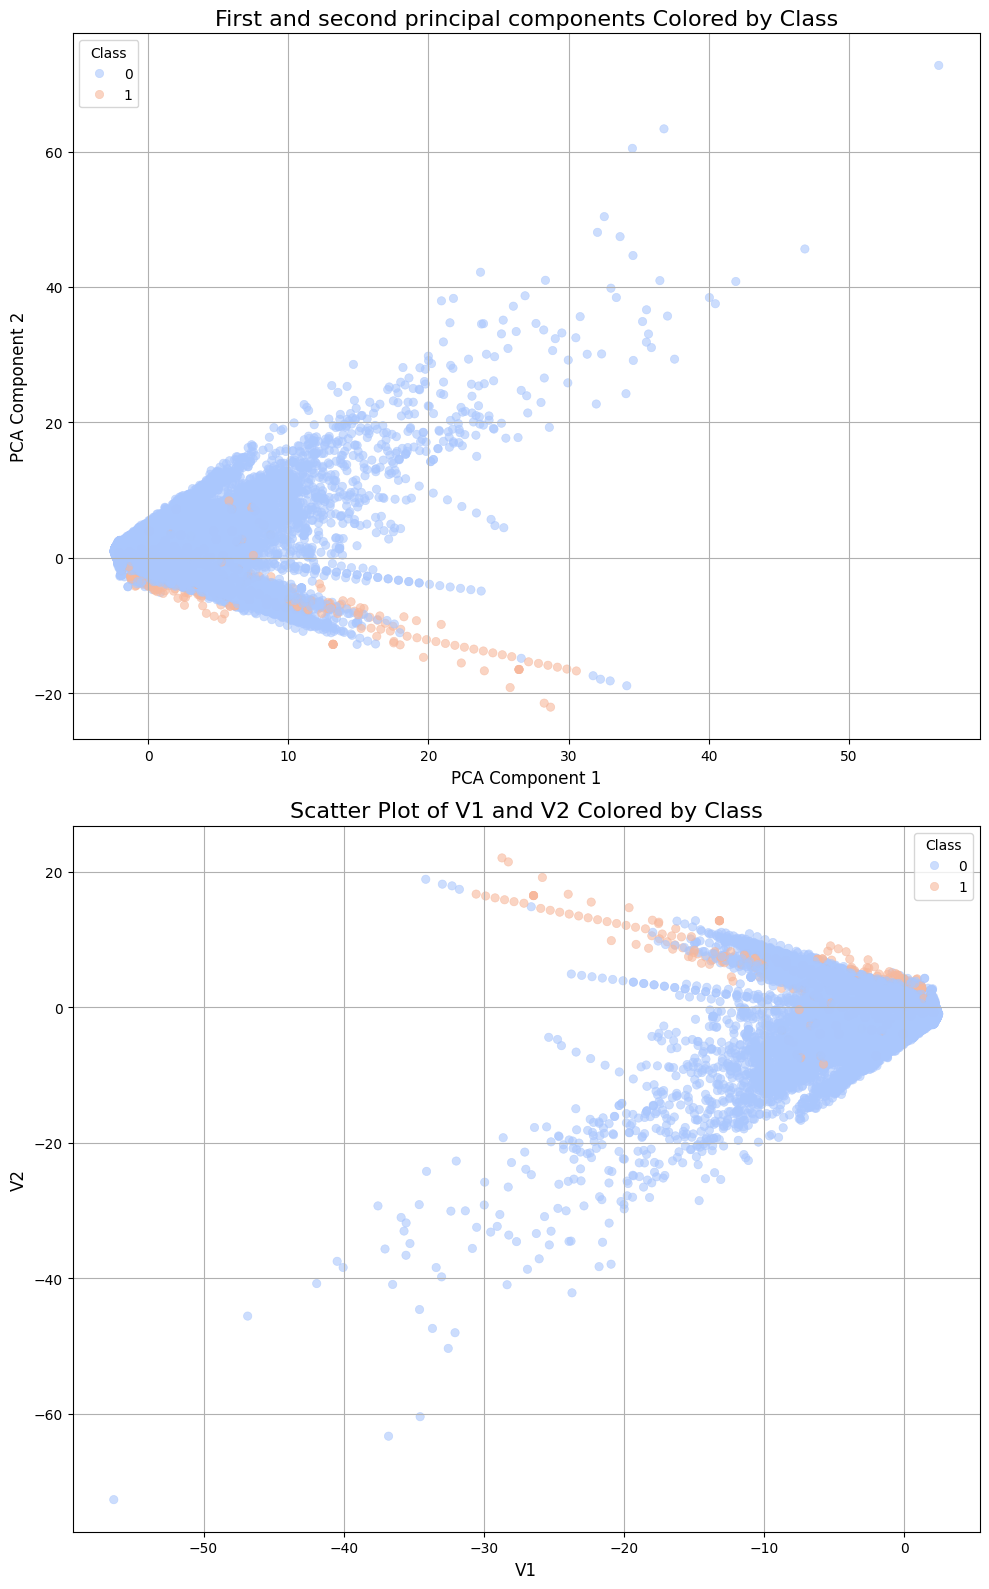

In [44]:
# Perform PCA and create the dataframe of principal components.
X = data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 
             'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]
y = data['Class']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Class'] = y

fig, axs = plt.subplots(2, 1, figsize=(10, 16))

sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Class', palette='coolwarm', alpha=0.6, ax=axs[0], edgecolor=None)
axs[0].set_title('First and second principal components Colored by Class', fontsize=16)
axs[0].set_xlabel('PCA Component 1', fontsize=12)
axs[0].set_ylabel('PCA Component 2', fontsize=12)
axs[0].grid(True)

sns.scatterplot(data=data, x='V1', y='V2', hue='Class', palette='coolwarm', alpha=0.6, ax=axs[1], edgecolor=None)
axs[1].set_title('Scatter Plot of V1 and V2 Colored by Class', fontsize=16)
axs[1].set_xlabel('V1', fontsize=12)
axs[1].set_ylabel('V2', fontsize=12)
axs[1].grid(True)

plt.tight_layout()
plt.show()

## Classification
The classification is run through the Autogluon package (https://arxiv.org/pdf/2003.06505) for automated machine learning. To provide an out-of-sample evaluation of the algorithm, the dataset is split in a train and in a test subset. Due to the unbalance of the target class, a stratified procedure is chosen. Many models are tested automatically such as neural nets, GBM, CatBoost, XGBoost, RandomForest, and ExtraTree. Each of them is trained with 4 bag folds. The initial results will then be a 4-levels ensembled model. The metric chosen to train the models is the average precision to, again, account for the unbalance between the two classes.

In [65]:
from sklearn.model_selection import train_test_split
predictors = data.columns.tolist()[:-1]
label_column = "Class"

# Perform stratified train-test split
train_data, test_data = train_test_split(data, test_size=0.2, stratify=data[label_column], random_state=42)

In [67]:
# Initialize the AutoGluon predictor
predictor = TabularPredictor(label=label_column, 
                             eval_metric='average_precision').fit(train_data,
                                                                  presets='medium_quality',
                                                                  num_bag_folds=4,
                                                                  num_stack_levels=4)

# Generate leaderboard
leaderboard = predictor.leaderboard(silent=True)
leaderboard

No path specified. Models will be saved in: "AutogluonModels\ag-20241012_143733"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.9.19
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          20
Memory Avail:       6.31 GB / 15.63 GB (40.4%)
Disk Space Avail:   858.23 GB / 952.74 GB (90.1%)
Presets specified: ['medium_quality']
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20241012_143733"
Train Data Rows:    227845
Train Data Columns: 30
Label Column:       Class
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not th

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L6,0.872261,average_precision,171.718547,2461.534299,0.031246,21.754870,6,True,62
1,WeightedEnsemble_L3,0.871194,average_precision,136.670498,1366.143198,0.034355,9.527385,3,True,26
2,CatBoost_BAG_L2,0.869669,average_precision,120.742641,713.451327,0.062360,12.866990,2,True,19
3,WeightedEnsemble_L4,0.868550,average_precision,163.989684,2115.117012,0.031362,9.532193,4,True,38
4,WeightedEnsemble_L5,0.866489,average_precision,173.688823,2725.010073,0.031246,9.680650,5,True,50
...,...,...,...,...,...,...,...,...,...,...
57,LightGBMLarge_BAG_L1,0.765264,average_precision,0.107726,3.329510,0.107726,3.329510,1,True,13
58,LightGBM_BAG_L1,0.757179,average_precision,0.051000,1.666417,0.051000,1.666417,1,True,4
59,LightGBMXT_BAG_L1,0.712369,average_precision,0.032754,1.747165,0.032754,1.747165,1,True,3
60,KNeighborsDist_BAG_L1,0.141373,average_precision,40.867272,0.333334,40.867272,0.333334,1,True,2


In [73]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, log_loss, precision_score, recall_score, f1_score, cohen_kappa_score, average_precision_score

y_true = test_data[label_column]
y_pred = predictor.predict(test_data)
y_pred_proba = predictor.predict_proba(test_data)

# Define metrics
metrics = {
    "Accuracy": accuracy_score(y_true, y_pred),
    "Balanced Accuracy": balanced_accuracy_score(y_true, y_pred),
    "roc_auc": roc_auc_score(y_true, y_pred_proba[1]),
    "Log Loss": log_loss(y_true, y_pred_proba),
    "Precision": precision_score(y_true, y_pred),
    "Recall": recall_score(y_true, y_pred),
    "F1": f1_score(y_true, y_pred),
    "Kappa": cohen_kappa_score(y_true, y_pred),
    "Average Precision": average_precision_score(y_true, y_pred)
}

pd.DataFrame(metrics, index = ["1"])

C:\Users\PC-NB\anaconda3\envs\new-env-name\lib\site-packages\sklearn\metrics\_classification.py:2969: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


,Accuracy,Balanced Accuracy,roc_auc,Log Loss,Precision,Recall,F1,Kappa,Average Precision
1,0.999631,0.923417,0.983186,0.002136,0.932584,0.846939,0.887701,0.887516,0.790105


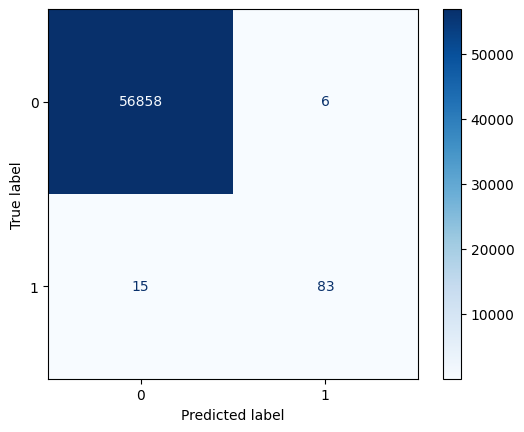

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = test_data[label_column]
y_pred = predictor.predict(test_data)
y_pred_proba = predictor.predict_proba(test_data)
conf_matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=predictor.class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()